# **Importing Library**




In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_style(style = 'whitegrid')

# **Importing Data**

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# ***EDA***

In [5]:
df.shape

(200, 5)

In [6]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


## **checking null value**

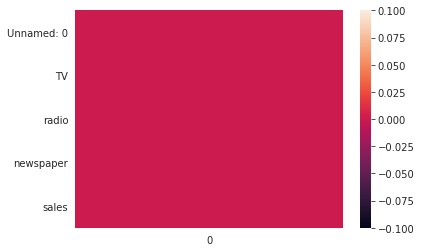

In [7]:
sns.heatmap(df.isnull().sum().to_frame())

No Null value

In [8]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## **Data Formatting**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## **Visualization**

In [11]:
def pplot(df,i):
  plt.figure(figsize=(20,5))
  plt.subplot(1,3,1)
  
  sns.histplot(x=i,data=df,kde=True)
  plt.subplot(1,3,2)
  sns.regplot(x=i,y='sales',data=df)
  plt.subplot(1,3,3)
  sns.boxplot(y=i,data=df)
  plt.show()

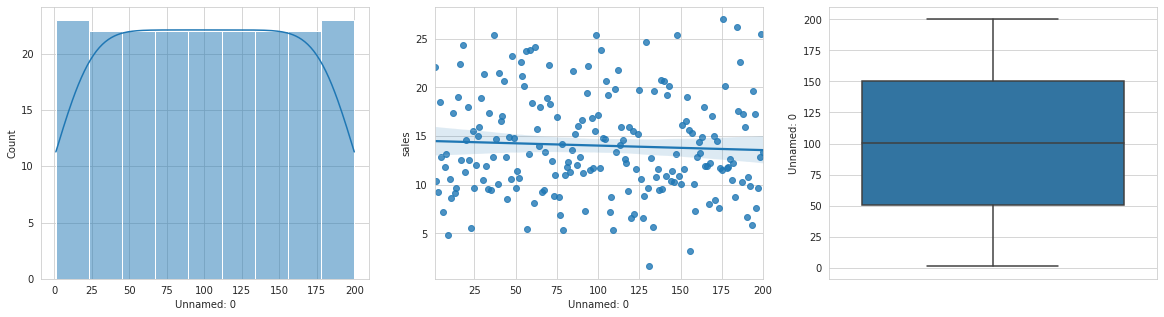

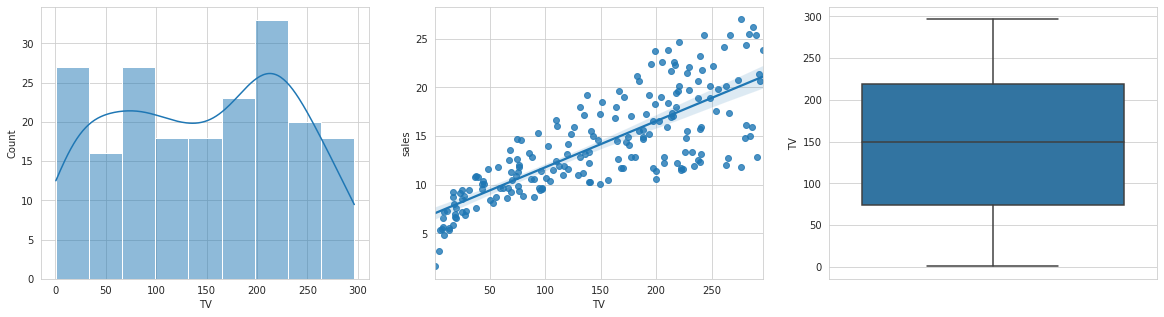

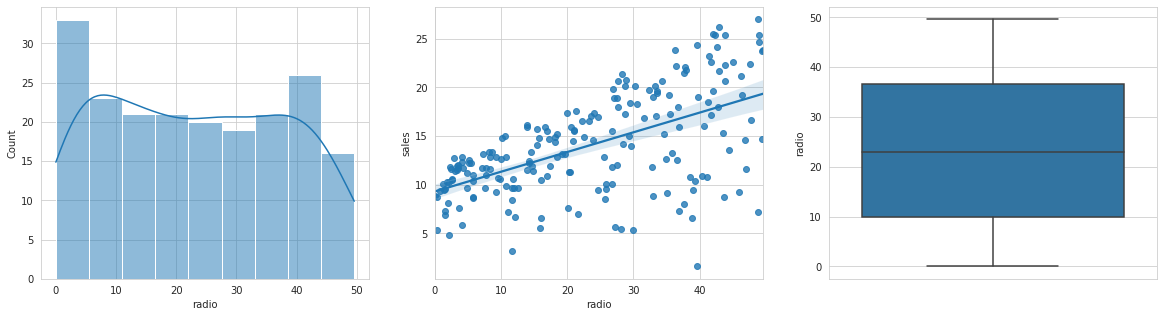

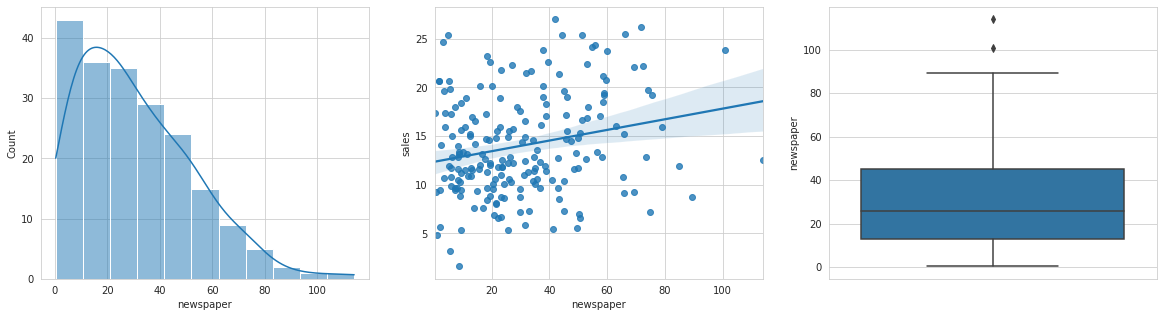

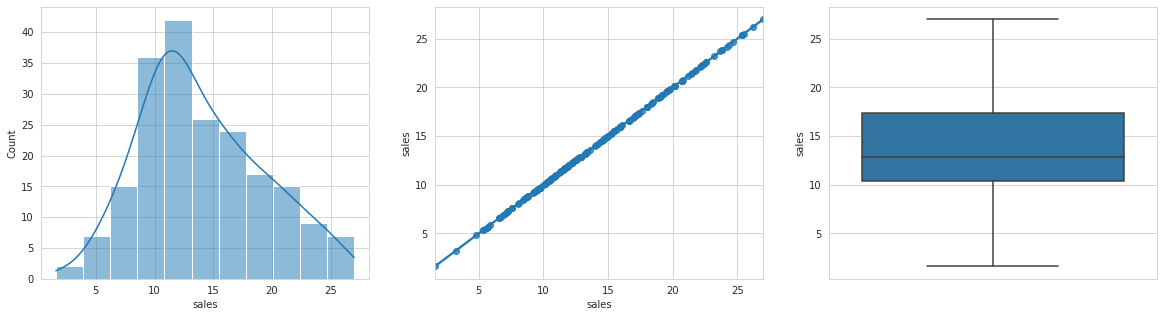

In [12]:
import scipy.stats as stat
import pylab 
for i in df.columns:
  pplot(df,i)

Tv and Radio are highly linerly related.

Data filtering:-

In [13]:
df.drop('Unnamed: 0',axis=1,inplace=True)

## **Changing Data type**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [15]:
x=df.drop('sales',axis=1)
y=df['sales']

In [16]:
from sklearn.preprocessing import power_transform as PT
pt=pd.DataFrame()
for i in df.columns:
  if df[i].min()<=0:
    pt1=(df[i]-df[i].min()+0.0001)
  else:
    pt1=df[i]
  pt=pd.concat([pt,pd.DataFrame(pt1)],axis=1)

pt1=PT(pt)
pt1=pd.DataFrame(pt1,columns=df.columns)


In [17]:
def pplot(df,i):
  plt.figure(figsize=(20,5))
  plt.subplot(1,3,1)
  
  sns.histplot(x=i,data=df,kde=True)
  plt.subplot(1,3,2)
  stat.probplot(df[i],dist='norm',plot=pylab)
  plt.subplot(1,3,3)
  sns.boxplot(y=i,data=df)
  plt.show()

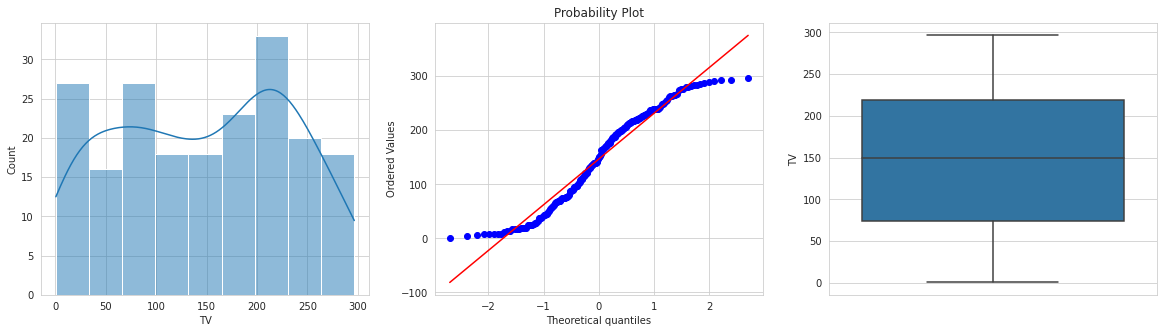

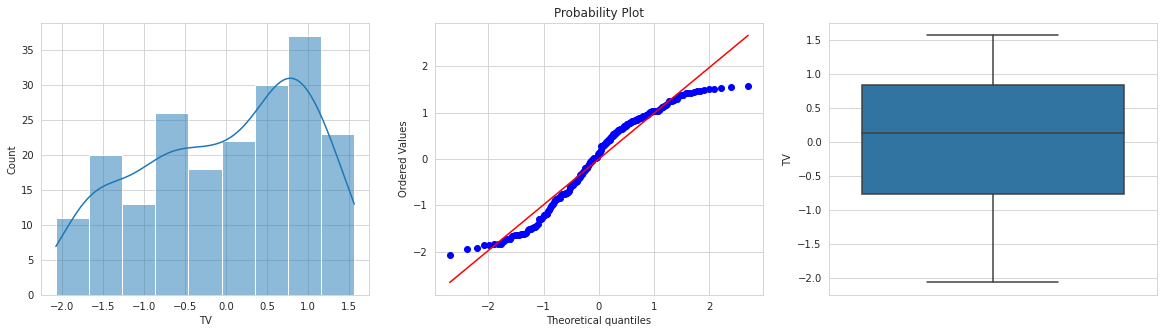

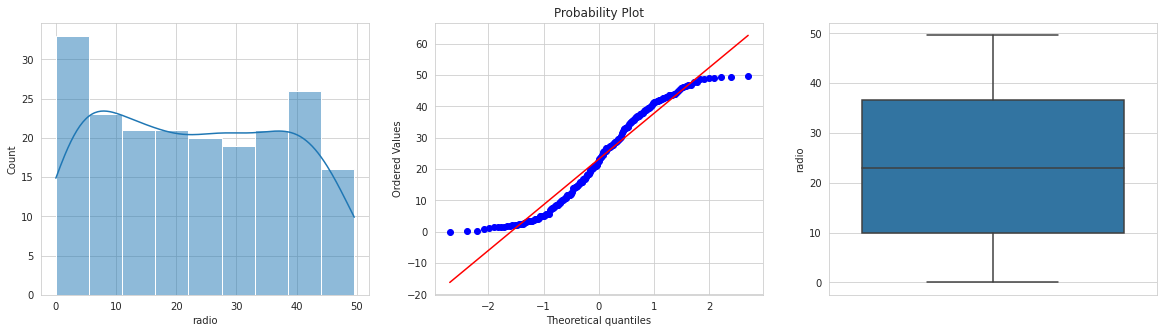

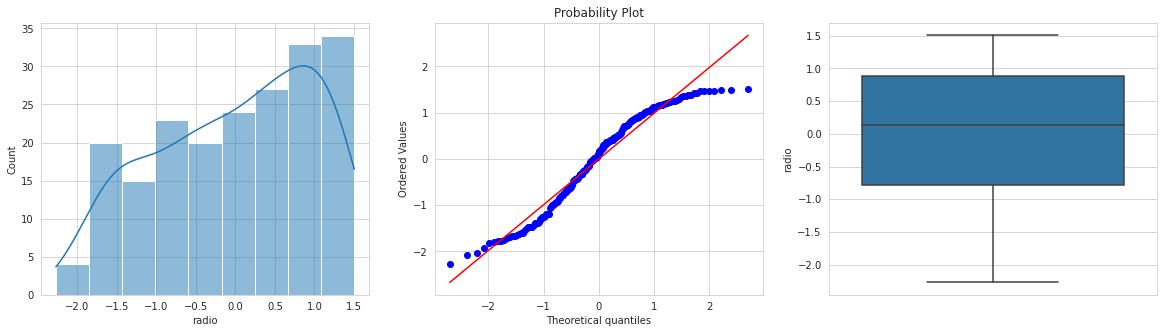

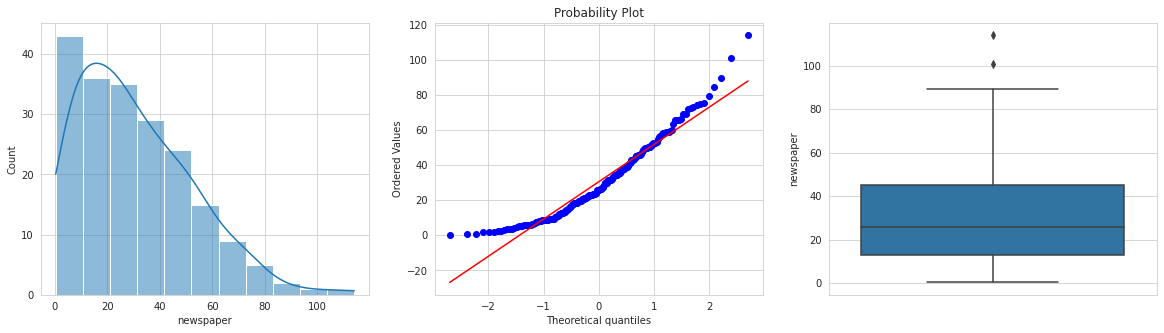

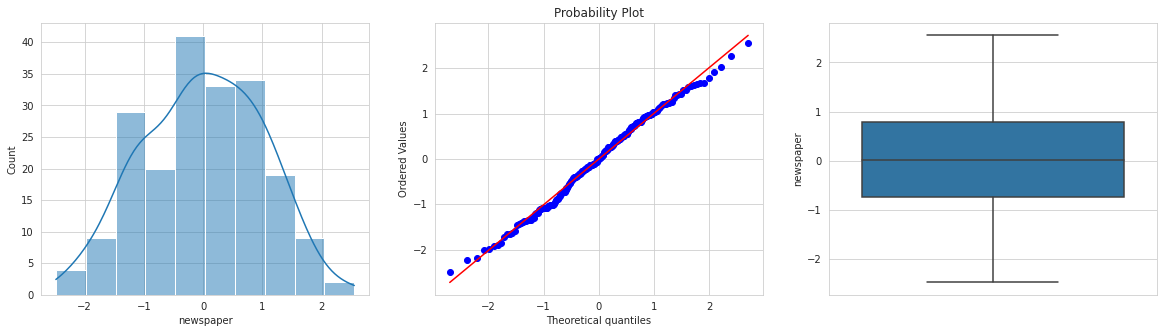

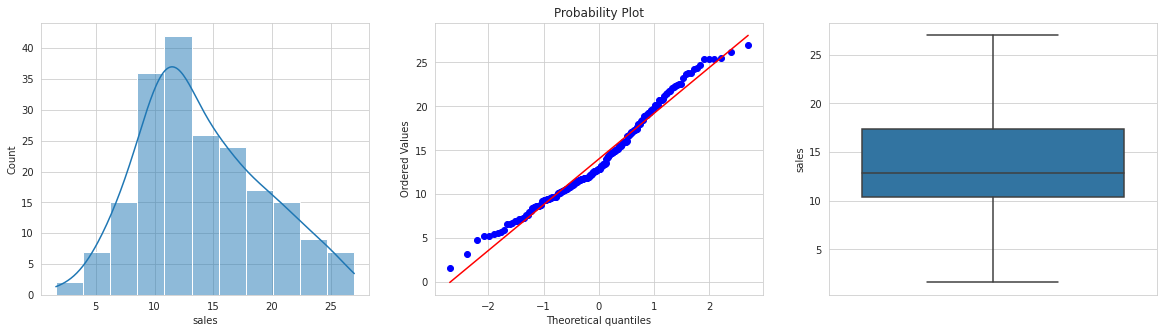

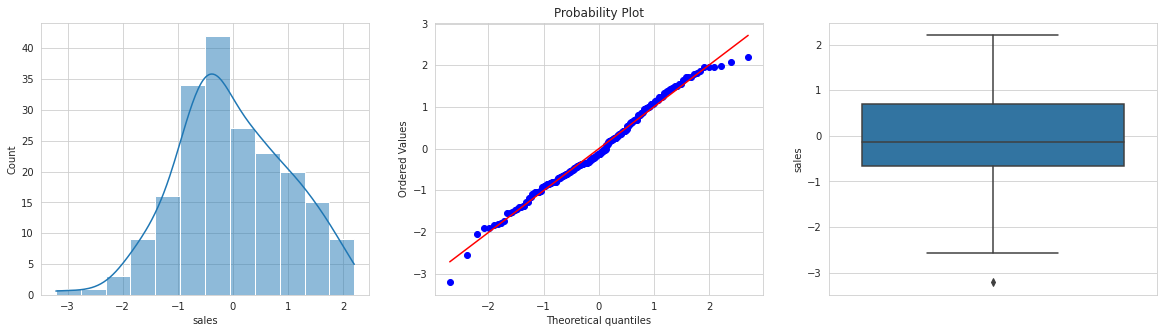

In [18]:
import scipy.stats as stat
import pylab 
for i in df.columns:
  pplot(df,i)
  pplot(pt1,i)

Outlier and normalization has been taken care of 


## **Correlation**

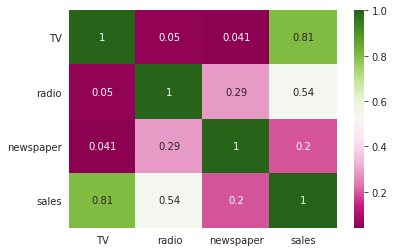

In [19]:

sns.heatmap(pt1.corr(),annot=True,cmap='PiYG')

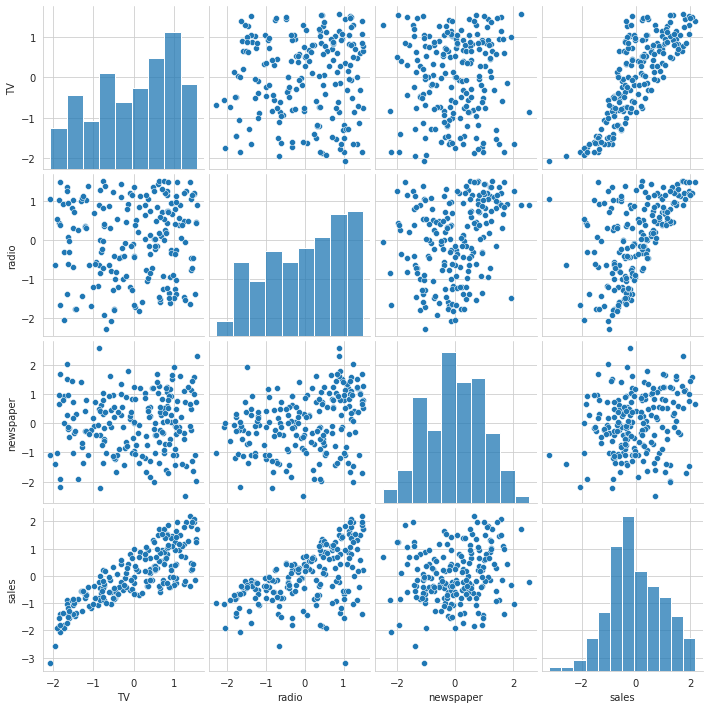

In [20]:
sns.pairplot(pt1)

## **ANOVA test**

In [21]:
x=pt1.drop('sales',axis=1)
y=pt1['sales']

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif as anova
s = SelectKBest(anova, k=3)
s.fit(x,y)

SelectKBest(k=3, score_func=<function f_classif at 0x7ff32b3eb4d0>)

In [23]:
pd.DataFrame([s.scores_,s.pvalues_],columns=x.columns).T.sort_values(by=0)

,0,1
newspaper,1.275694,1.230143e-01
radio,1.441081,4.109246e-02
TV,4.023262,2.004018e-10


newspaper is least related to output. 

## **Separating dependent and independent variables**

In [24]:
from sklearn.model_selection import train_test_split as TTS
x_train,x_test,y_train,y_test=TTS(x,y,test_size=0.1,random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler as SS
ss=SS()
x_train_scaler=ss.fit_transform(x_train)
x_test_scaler= ss.transform(x_test)

In [26]:
import scipy.stats as stat
import pylab 
def z_outlier(a,b):
  df_z=pd.concat([a,b],axis=1)
  z=np.abs(stat.zscore(df_z))
  a=int(df_z.size)
  df_z = df_z[(z<3).all(axis=1)]
  print('Percent of data retained = '+ str(int(df_z.size)/a))
  x_z=df_z.drop('sales',axis=1)
  y_z=df_z.sales
  return(x_z,y_z)

In [27]:
x_train,y_train=z_outlier(x_train,y_train)


Percent of data retained = 0.9944444444444445


In [28]:
x_train_scaler= ss.transform(x_train)

# **Model Evaluation**

## **Linear Regression**(0.898)

In [29]:
from sklearn.linear_model import LinearRegression as lr
reg_lr = lr(normalize=True).fit(x_train_scaler,y_train)
y_pred=reg_lr.predict(x_test_scaler)
from sklearn.metrics import mean_squared_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))

0.9103391501742454
0.108845926512748


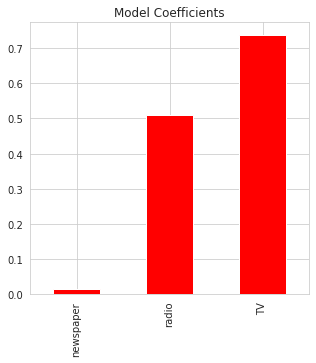

In [30]:
coef = pd.Series(reg_lr.coef_, x.columns).sort_values()
plt.figure(figsize=(5,5))
coef.plot(kind='bar', title="Model Coefficients" , color = 'red')

In [31]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(lr(), ss.transform(x), y, cv=10)

lr_reg=cv_results['test_score'].mean()


## **Lasso Regression**

In [32]:
from sklearn.linear_model import Lasso
reg_lr = Lasso().fit(x_train_scaler,y_train)
y_pred=reg_lr.predict(x_test_scaler)
from sklearn.metrics import mean_squared_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))

-0.01338275890524665
1.2302201631977223


## **Ridge Regression**(0.898)

In [33]:
from sklearn.linear_model import Ridge
reg_lr = Ridge().fit(X=x_train_scaler,y=y_train)
y_pred=reg_lr.predict(x_test_scaler)
from sklearn.metrics import mean_squared_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))

0.9089842974436562
0.1104906822900567


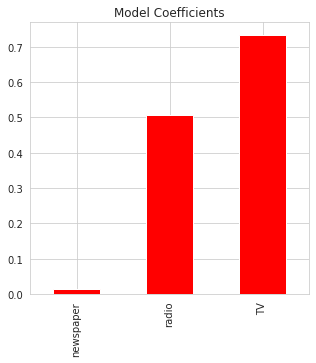

In [34]:
coef = pd.Series(reg_lr.coef_, x.columns).sort_values()
plt.figure(figsize=(5,5))
coef.plot(kind='bar', title="Model Coefficients" , color = 'red')

In [35]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(Ridge(), ss.transform(x), y, cv=10)

ri_reg=cv_results['test_score'].mean()


## **Random Forest Regression**(0.972)

In [36]:
from sklearn.ensemble import RandomForestRegressor as RFR 
reg_rfc = RFR().fit(x_train, y=y_train)
y_pred=reg_rfc.predict(x_test)
from sklearn.metrics import mean_squared_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))

0.9807555602084902
0.023362246547924122


In [37]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(RFR(), x, y, cv=10)

rfr_reg=cv_results['test_score'].mean()


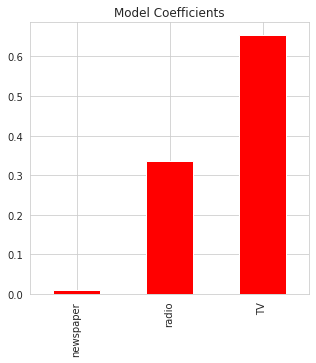

In [38]:
coef = pd.Series(reg_rfc.feature_importances_, x.columns).sort_values()
plt.figure(figsize=(5,5))
coef.plot(kind='bar', title="Model Coefficients" , color = 'red')

## **XGB Regressor**(0.975)

In [39]:
from xgboost import XGBRegressor as XBR
xgr=XBR().fit(x_train,y_train)

y_pred = xgr.predict(x_test)
from sklearn.metrics import mean_squared_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))


[13:28:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9903158885927629
0.011756257950062575


In [40]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(XBR(), x, y, cv=10)

xgr_reg=cv_results['test_score'].mean()




[13:28:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:28:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:28:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:28:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:28:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:28:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:28:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:28:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

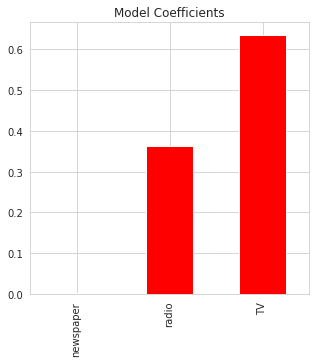

In [41]:
coef = pd.Series(xgr.feature_importances_, x.columns).sort_values()
plt.figure(figsize=(5,5))
coef.plot(kind='bar', title="Model Coefficients" , color = 'red')

## **Extra Tree Regressor**(0.933)

In [42]:
from sklearn.tree import ExtraTreeRegressor as ETR 

etr = ETR()
etr.fit(x_train, y_train)
y_pred=etr.predict(x_test)
from sklearn.metrics import mean_squared_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))

0.9562935886814262
0.05305844015267099


In [43]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(ETR(), x, y, cv=10)

etr_reg=cv_results['test_score'].mean()


## **Support vector Regressor**(0.959)

In [44]:
from sklearn.svm import SVR

svc = SVR()
svc.fit(x_train_scaler, y_train)
y_pred=svc.predict(x_test_scaler)
from sklearn.metrics import mean_squared_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))

0.9684141750158051
0.038344365369673936


In [45]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(SVR(), ss.transform(x), y, cv=10)

svr_reg=cv_results['test_score'].mean()


## **Comparing models**

In [46]:
score=[lr_reg,ri_reg,rfr_reg,xgr_reg,etr_reg,svr_reg]
name=['LR','Ridge','RFR','XGR','ETR','SVR']
pd.DataFrame([name,score]).T

,0,1
0,LR,0.898968
1,Ridge,0.899101
2,RFR,0.972671
3,XGR,0.975359
4,ETR,0.934819
5,SVR,0.958909


XGR is the best model folled by RFR

# **Hyper-parameter tuning** 

## **Random Forest**(0.973)

In [47]:
from sklearn.model_selection import GridSearchCV


n_estimators = [int(x) for x in range(200,1000,200)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
               }
print(random_grid)

{'n_estimators': [200, 400, 600, 800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [48]:

rf_random = GridSearchCV(RFR(), random_grid,  
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 2592 out of 2592 | elapsed: 20.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [49]:
print('Best score:', rf_random.best_score_)
print('Best score:', rf_random.best_params_)
print('Best score:', rf_random.best_estimator_)


Best score: 0.9733213533870466
Best score: {'bootstrap': True, 'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}
Best score: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=800, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [50]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(RFR(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False),x,y,cv=10)

cv_results['test_score'].mean()

0.973870021924401

## **XG Boost**(0.9757)




In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
}

xg_grid = GridSearchCV(XBR(n_jobs=-1), params, n_jobs=-1, cv=3)
xg_grid.fit(x_train, y_train)

print('Best score:', xg_grid.best_score_)
print('Best score:', xg_grid.best_params_)
print('Best score:', xg_grid.best_estimator_)

Best score: 0.9731515884554748
Best score: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 500, 'objective': 'reg:squarederror', 'subsample': 0.5}
Best score: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=3, missing=None, n_estimators=500,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.5, verbosity=1)


In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(XBR(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=3, missing=None, n_estimators=500,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.5, verbosity=1), x, y, cv=10)

hp_xgr=cv_results['test_score'].mean()

In [ ]:
hp_xgr

0.9757945435986894

## **Support vector**(0.979)

In [54]:
params={'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
 'C':[0.1,0.5,1,2,5,8,10,12,13,14,15,16,17,18,20,25]}

svr_grid = GridSearchCV(SVR(), params, cv=10)
svr_grid.fit(ss.transform(x), y)

print('Best score:', svr_grid.best_score_)
print('Best score:', svr_grid.best_params_)
print('Best score:', svr_grid.best_estimator_)

Best score: 0.9847392208508948
Best score: {'C': 14, 'kernel': 'rbf'}
Best score: SVR(C=14, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [55]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(SVR(C=14, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), ss.transform(x), y, cv=10)

hp_SVR=cv_results['test_score'].mean()

In [56]:
svr = SVR(C=14, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
svr.fit(x_train_scaler,y_train)

SVR(C=14, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# **Best Model Evaluation**

In [51]:
x,y=z_outlier(x,y)

Percent of data retained = 0.995


In [66]:
y_pred = svr.predict(ss.transform(x))
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y,y_pred))
print(rms(y,y_pred))


0.9932419349786787
0.06104660499215476


(array([ 1.,  0.,  0.,  2., 32., 51., 70., 41.,  0.,  2.]),
 array([-0.44245889, -0.37004008, -0.29762128, -0.22520248, -0.15278368,
        -0.08036488, -0.00794607,  0.06447273,  0.13689153,  0.20931033,
         0.28172914]),
 <a list of 10 Patch objects>)

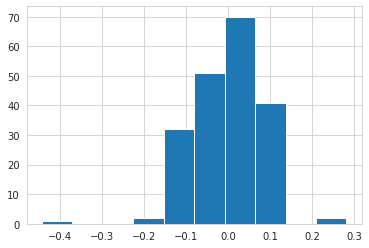

In [58]:
plt.hist((y_pred-y))

# **Saving the model** 

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [61]:
import pickle

filename = '/content/drive/MyDrive/datatrained/adv_sales/model.sav'
pickle.dump(svr, open(filename, 'wb'))

# **Conclusion**

In [64]:

filename = '/content/drive/MyDrive/datatrained/adv_sales/model.sav'
model = pickle.load(open(filename, 'rb'))

In [67]:
y_pred = model.predict(ss.transform(x))
from sklearn.metrics import mean_absolute_error as rms, r2_score
print(r2_score(y,y_pred))
print(rms(y,y_pred))

0.9932419349786787
0.06104660499215476


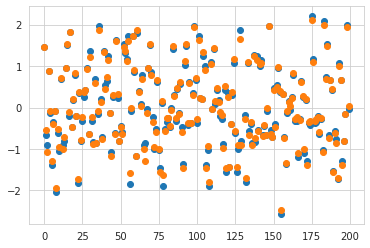

In [68]:
plt.scatter(x=y.index,y=y,cmap='blue')
plt.scatter(x=y.index,y=y_pred,cmap='red')

In [69]:
pd.concat([pd.DataFrame(y_pred),pd.DataFrame(y)],axis=1).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,1.447896,-0.550447,-1.076687,0.882303,-0.077698,-1.292226,-0.399641,-0.083494,-1.947079,-0.507300,-0.953315,0.717598,-1.002596,-0.703109,0.947512,1.536895,-0.118354,1.820487,-0.480328,0.199295,0.823850,-0.201305,-1.715815,0.378304,-0.791628,-0.216336,0.363133,0.426894,0.931487,-0.643907,1.206460,-0.224697,-0.868396,0.592432,-0.849750,-0.084846,1.867179,0.123849,-0.754999,1.330903,...,0.042094,0.219753,0.822368,-0.279525,-0.225379,-1.095184,-0.309725,0.622324,0.273831,-0.992817,0.200783,-1.392984,-0.341987,-0.333023,2.101031,1.089100,-0.317563,-0.274504,-0.223979,-0.585588,-0.259952,-1.062039,1.985163,0.682456,1.492683,-0.736824,0.653085,0.444765,-1.564333,-0.615706,-0.859290,-1.704909,1.001295,0.654349,-1.392688,-0.802671,-0.152840,1.945519,0.030580,NaN
sales,1.465763,-0.650212,-0.892710,0.880623,-0.136340,-1.392285,-0.356732,-0.077627,-2.046962,-0.607308,-1.053370,0.692431,-0.915341,-0.803196,0.964599,1.512636,-0.215529,1.818600,-0.459766,0.189231,0.795684,-0.215529,-1.815951,0.355095,-0.803196,-0.316036,0.263466,0.427503,0.947879,-0.628717,1.355335,-0.336348,-0.825426,0.692431,-0.847754,-0.156039,1.967601,0.207869,-0.715227,1.371203,...,0.151792,-0.058181,0.244986,0.795684,-0.336348,-0.336348,-1.195529,-0.275625,0.640242,0.263466,-1.100277,0.170539,-1.292814,-0.377189,-0.418326,2.200949,1.162418,-0.377189,-0.356732,-0.195633,-0.628717,-0.275625,-1.030090,2.085027,0.727014,1.543737,-0.671795,0.675077,0.427503,-1.519968,-0.564744,-0.759024,-1.732965,1.064148,0.675077,-1.292814,-0.803196,-0.156039,1.982364,-0.038797
